In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
move_to_rootf(print_tf=True)

cwd: /Users/opisthofulax/PhD/LRG-Signed


In [4]:

# Example graph and array
lattice = Lattice2D(32, pflip=0.1, geometry='squared')
lattice.flip_random_fract_edges()
G = lattice.H
node_values = lattice.bin_eigV()
  # Array with a value for each node

# Assign values to nodes
for i, v in enumerate(node_values):
    G.nodes[i]['value'] = v

# Create subgraphs for +1 and -1 values
G_pos = G.copy()
G_neg = G.copy()

for node in G.nodes(data=True):
    if node[1]['value'] == 1:
        G_neg.remove_node(node[0])
    else:
        G_pos.remove_node(node[0])

# Find connected components and calculate cluster sizes
clusters_pos = [len(c) for c in nx.connected_components(G_pos)]
clusters_neg = [len(c) for c in nx.connected_components(G_neg)]

# Calculate distribution of cluster sizes
distribution_pos = {size: clusters_pos.count(size) for size in set(clusters_pos)}
distribution_neg = {size: clusters_neg.count(size) for size in set(clusters_neg)}

print("Positive cluster size distribution:", distribution_pos)
print("Negative cluster size distribution:", distribution_neg)


Positive cluster size distribution: {1: 21, 2: 4, 3: 1, 4: 1, 8: 1, 13: 1, 15: 1, 17: 1}
Negative cluster size distribution: {935: 1}


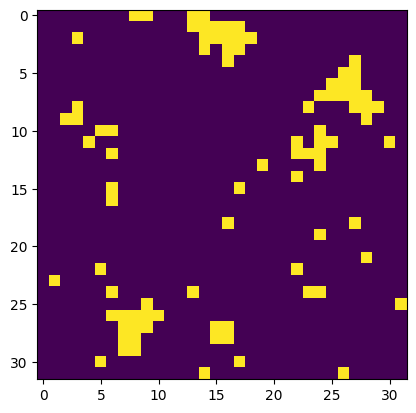

In [5]:
plt.imshow(node_values.reshape(lattice.syshape))

In [ ]:
for L in [8, 16, 32, 64, 128, 256]:
    merged_dict = Counter()
    number_of_averages = 4096 // L
    lattice = Lattice2D(L, pflip=p)
    filename = f'{lattice.lrgsgpath}p={p:.3g}_na={number_of_averages}.pickle'
    if os.path.exists(filename):
        continue
    for avg in tqdm(range(number_of_averages)):
        lattice.flip_random_fract_edges()
        dist_dict = lattice.cluster_distribution_list()
        merged_dict += Counter(dist_dict)
        lattice.unflip_all()
        delattr(lattice, "eigV")


    with open(filename, 'wb') as file:
        pickle.dump(list(merged_dict.values()), file)

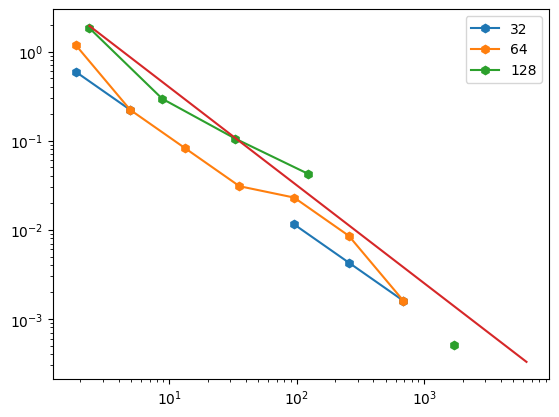

In [34]:
p = 0.01
#
for side in [32, 64, 128]:
    fpath = f"data/cluster_data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={999}_.pickle"
    with open(fpath, 'rb') as file:
        prova = pickle.load(file)
    binc, hist, bw = log_binning(prova, 8)
    hist1 = hist/bw
    np.where(hist1==0., np.inf, hist1)
    plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
plt.legend()
plt.xscale('log')
plt.yscale('log')

1000 medie, up to 1024, progressive save

In [4]:
lattice = Lattice2D(64, pflip=0.12)
lattice.flip_random_fract_edges()
dist_dict = lattice.cluster_distribution_list()

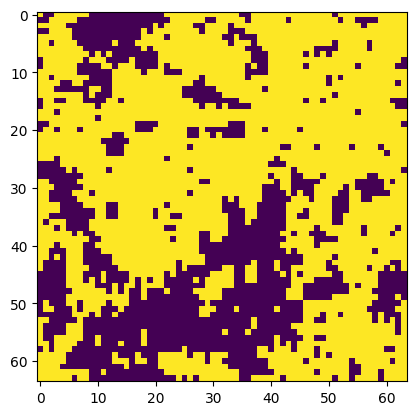

In [7]:
im = flip_to_positive_majority(lattice.eigV[0]).reshape(lattice.syshape)
plt.imshow(np.sign(im))